
```
Student ID: 2358549
Student Name: Gaurab Chhetri
```



In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2.1. Exercise 1 - Basic Image Processing:**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

**1. Read and Display Image:**

Use Pillow to read and show the image. Optionally, use Matplotlib.


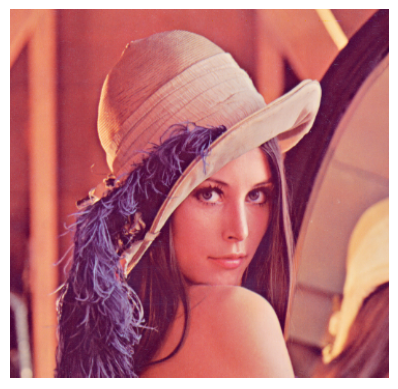

In [ ]:
image_colored = Image.open("/content/drive/MyDrive/AI(LastSem)/lenna_image.png")

plt.imshow(image_colored)
plt.axis("off")
plt.show()

**2. Extract Top-Left (100x100) Pixels:**

Display only the top-left 100x100 pixels using NumPy.

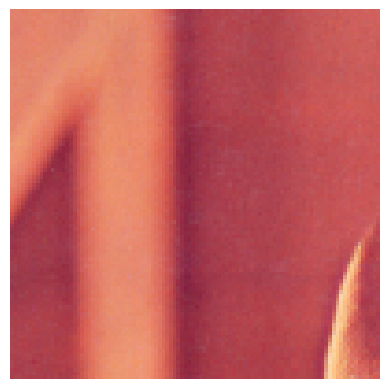

In [ ]:
# Convert image to NumPy array
image_array = np.array(image_colored)

# Extract the top-left 100x100 pixels
top_left = image_array[:100, :100]

# Display the extracted section
plt.imshow(top_left)
plt.axis("off")
plt.show()


**3. Show RGB Channels:**

Separate and display the Red, Green, and Blue channels individually.

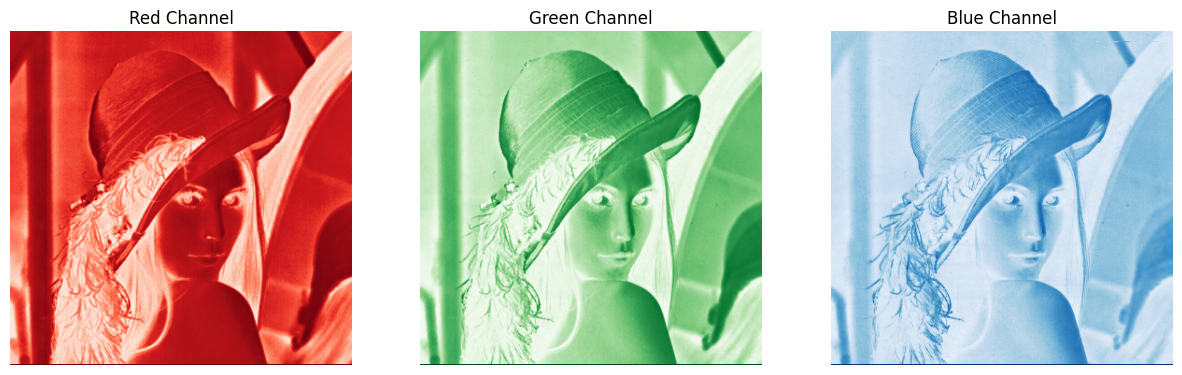

In [ ]:
# Extract individual color channels
red_channel = image_array[:, :, 0]  # Red
green_channel = image_array[:, :, 1]  # Green
blue_channel = image_array[:, :, 2]  # Blue

# Display each channel
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(red_channel, cmap="Reds")
ax[0].set_title("Red Channel")

ax[1].imshow(green_channel, cmap="Greens")
ax[1].set_title("Green Channel")

ax[2].imshow(blue_channel, cmap="Blues")
ax[2].set_title("Blue Channel")

for a in ax:
    a.axis("off")

plt.show()


**4. Modify Top-Left Pixels: **

Set the top-left 100x100 pixels to 210 (light gray) and display the image.

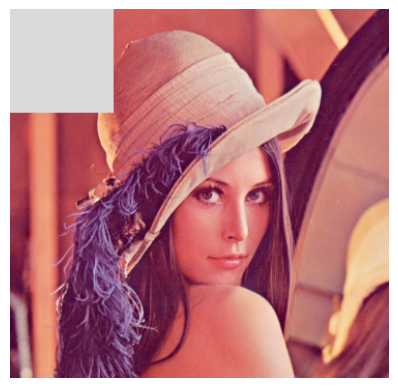

In [ ]:
image_array[:100, :100] = 210

modified_image = Image.fromarray(image_array)

plt.imshow(modified_image)
plt.axis("off")
plt.show()


# **2.2. Exercise - 2:**



**1. Load & Display Grayscale Image**

*  Load a grayscale image (Pillow).
*  Display it (Matplotlib).

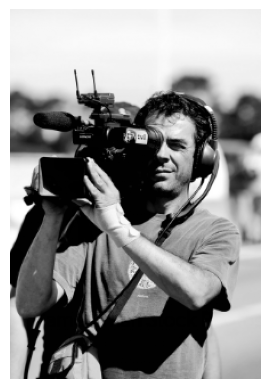

In [5]:
from PIL import Image  # Import Image module from PIL
import matplotlib.pyplot as plt  # Import matplotlib for displaying images

# Open the image, convert it to grayscale
gray_image = Image.open("/content/drive/MyDrive/AI(LastSem)/camera_man.jpg").convert("L")

# Display the grayscale image
plt.imshow(gray_image, cmap="gray")
plt.axis("off")  # Hide axes

plt.show()


**2. Extract & Display Middle Section**

*  Crop a 150-pixel section from the center.
*  Display the cropped section.

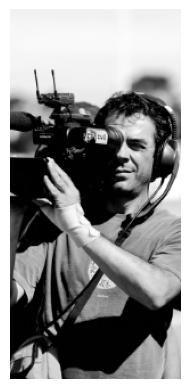

In [7]:
import numpy as np  # Import numpy
import matplotlib.pyplot as plt
from PIL import Image

# Open the image and convert to grayscale
gray_image = Image.open("/content/drive/MyDrive/AI(LastSem)/camera_man.jpg").convert("L")

# Convert grayscale image to numpy array
gray_array = np.array(gray_image)

# Extract the middle 150 pixels (centered)
middle = gray_array[:, gray_array.shape[1]//2 - 75 : gray_array.shape[1]//2 + 75]

# Display the extracted section
plt.imshow(middle, cmap="gray")
plt.axis("off")
plt.show()


**3. Apply Thresholding**

*  Set pixel values below 100 to 0, above 100 to 255.
*  Display the binary image.

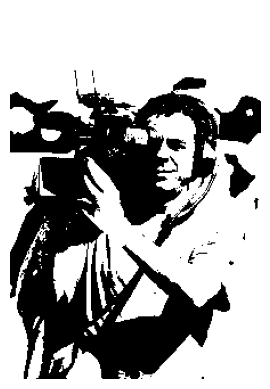

In [8]:
binary_image = np.where(gray_array < 100, 0, 255)
plt.imshow(binary_image, cmap="gray")
plt.axis("off")
plt.show()


**4. Rotate Image (90° Clockwise)**

*  Rotate the image 90° clockwise.
*  Display the rotated image.

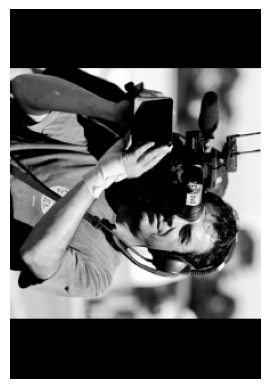

In [9]:
rotated = gray_image.rotate(-90)
plt.imshow(rotated, cmap="gray")
plt.axis("off")
plt.show()


**5. Convert to RGB**

*  Convert grayscale to RGB (replicate values across R, G, B).
*  Display the RGB image.

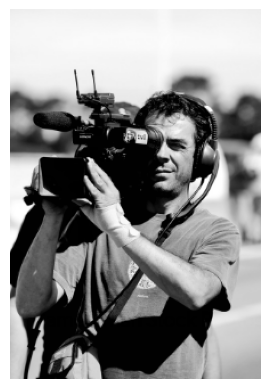

In [10]:
rgb_image = Image.merge("RGB", (gray_image, gray_image, gray_image))
plt.imshow(rgb_image)
plt.axis("off")
plt.show()


# **3. Image Compression & Decompression using PCA**

**1. Load & Prepare Data**

*  Load an image (convert to grayscale if needed).
*  Standardize the data & compute the covariance matrix.

In [12]:
gray_image = Image.open("/content/drive/MyDrive/AI(LastSem)/lenna_image.png").convert("L")
gray_array = np.array(gray_image)

mean = np.mean(gray_array, axis=0)
std = np.std(gray_array, axis=0)
standardized_data = (gray_array - mean) / std


**2. Eigen Decomposition & PCA Selection**

*  Compute eigenvalues & eigenvectors.
*  Sort eigenvalues, choose top k components.
*  Identify principal components using a cumulative sum plot.

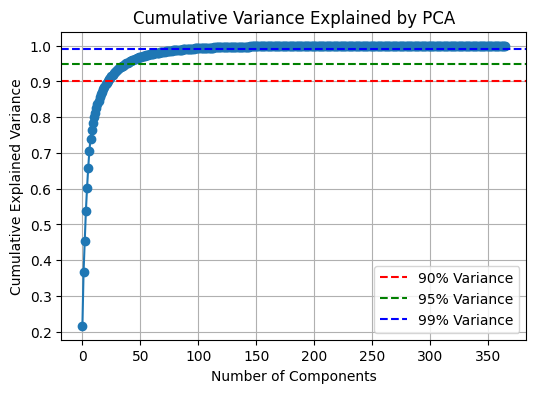

In [13]:
cov_matrix = np.cov(standardized_data, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(6, 4))
plt.plot(cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.90, color='r', linestyle='--', label="90% Variance")
plt.axhline(y=0.95, color='g', linestyle='--', label="95% Variance")
plt.axhline(y=0.99, color='b', linestyle='--', label="99% Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Variance Explained by PCA")
plt.legend()
plt.grid(True)
plt.show()

**3. Reconstruction & Experiment**

*  Reduce dimensions using selected eigenvectors.
*  Reconstruct with different principal component combinations.
*  Compare results & display outputs.

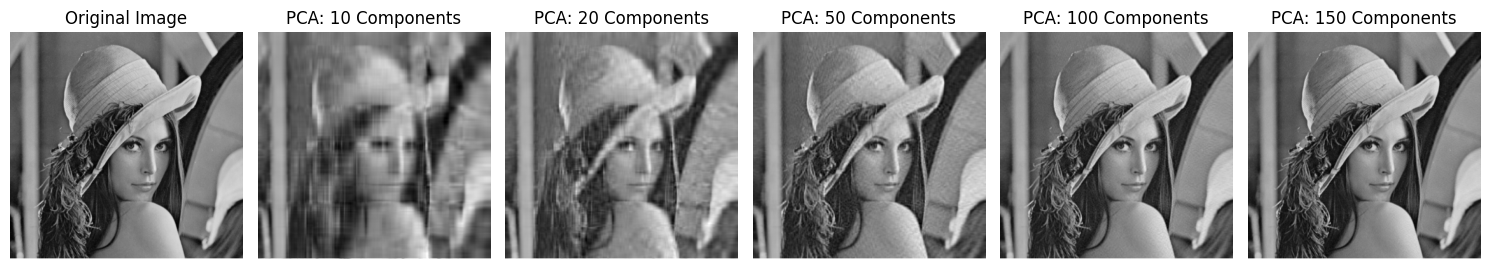

In [14]:
def reconstruct_pca(image, eigenvectors, num_components):
    selected_vectors = eigenvectors[:, :num_components]
    compressed = np.dot(image, selected_vectors)
    restored = np.dot(compressed, selected_vectors.T)
    return (restored * std) + mean

components = [0, 10, 20, 50, 100, 150]

fig, ax = plt.subplots(1, len(components), figsize=(15, 6))

for i, n in enumerate(components):
    if n == 0:
        ax[i].imshow(gray_array, cmap="gray")
        ax[i].set_title("Original Image")
    else:
        reconstructed = reconstruct_pca(standardized_data, eigenvectors, n)
        ax[i].imshow(np.clip(reconstructed, 0, 255), cmap="gray")
        ax[i].set_title(f"PCA: {n} Components")

    ax[i].axis("off")

plt.tight_layout()
plt.show()